# Lab 5: KNN

In this assignment, we will learn the KNN model.

First, please study the given example, which uses the KNN model for the breast cancer classification task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model.

Based on the given example, your task is to use the KNN model to predict the presence of heart disease.


## 1. Example

### 1.1 Load the breast cancer data

Here, we use the [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) dataset in sklearn. It is a binary classification dataset. Each sample has 30 numerical features, which can be found in [7.1.7](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

X, y = datasets.load_breast_cancer(return_X_y=True)
print("#samples: {}, #features: {}".format(X.shape[0], X.shape[1]))

#samples: 569, #features: 30


### 1.2 Split the data into two subsets and normalize the features of samples

Here, we use 69 samples as the testing set and use the remained samples to train the logistic regression model. 

In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)


train_val: 500, test: 69


### 1.3 Train the KNN model and select the hyperparameter with cross-validation

Here, we use cross-validation to select the hyperparameter $K$

In [27]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.9640000000000001
{'n_neighbors': 4}


### 1.4 Evaluate the learned model

After getting the best hyperparameter $K$,  we evaluate this  model on the testing set. 

In [28]:
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.971, recall: 0.975, precision: 0.975, f1: 0.975,


## 2. Task

Here, we use the [heart disease](./heart.csv) dataset. Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The last column refers to the presence of heart disease in the patient.

The task is to predict whether a person has the heart disease. Here, you can use your code in Lab04 for Task 2.1 and Task 2.2. 

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features
* Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
165 138


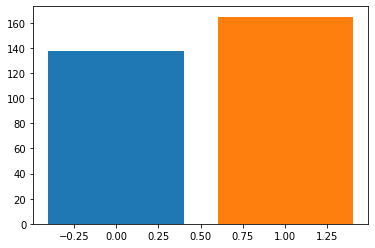

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("heart.csv")
print(df.info())
positive = 0
negative = 0
for n in df['target']:
    if n == 1:
        positive = positive + 1
    else:
        negative = negative + 1
print(positive, negative)
plt.bar(0, negative)
plt.bar(1, positive)
plt.show()

### 2.2 Split the data into two subsets and normalize the features of samples

* Split the dataset into the train_val set and testing set. 
* Normalize features

In [30]:
x = df.drop("target", axis=1).values
y = df["target"].values

xTrainVal, xTest, yTrainVal, yTest = train_test_split(x, y, test_size=.205)
print(xTrainVal.shape[0])
print(xTest.shape[0])
xTrainVal = normalizer.fit_transform(xTrainVal)
xTest = normalizer.transform(xTest)

240
63


### 2.3 Train the KNN model and select the hyperparameter with cross-validation


* Use the 5-fold cross-validation to select the hyperparameter $K$.
* Search $K$ from $\{1, 2, 3, 4, 5\}$


In [31]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn = KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(xTrainVal, yTrainVal)

print(grid.best_score_)
print(grid.best_params_)

0.8375
{'n_neighbors': 4}


### 2.4 Evaluate the learned model

* Report the prediction accuracy, recall, precision, and F1 score.

* Note that you should implement the code for these metrics by yourself. Please do NOT use the built-in function in sklearn. 

In [32]:
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(xTrainVal, yTrainVal)

# evaluate the model on the testing set
yPred = clf_knn.predict(xTest)
print(yPred)

[0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1]


In [33]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(yTest)):
    if yTest[i] == yPred[i]:
        if yTest[i] == 1:
            tp = tp + 1
        else:
            tn = tn + 1
    elif yTest[i] == 1:
        fp = fp + 1
    else:
        fn = fn + 1

print(tp, fp)
print(fn, tn)

27 10
3 23


In [34]:
acc = (tp + tn) / (tp + fp + tn + fn)
rec = tp / (tp + fp)
pre = tp / (tp + fn)
f1 = ((2 * rec * pre) / (rec + pre))

print("accuracy = " + str(acc))
print(accuracy_score(yTest, yPred))
print("recall = " + str(rec))
print(recall_score(yTest, yPred))
print("precision = " + str(pre))
print(precision_score(yTest, yPred))
print("f1 score = " + str(f1))
print(f1_score(yTest, yPred))

accuracy = 0.7936507936507936
0.7936507936507936
recall = 0.7297297297297297
0.7297297297297297
precision = 0.9
0.9
f1 score = 0.8059701492537312
0.8059701492537312
